# Programming for Data Analysis Project 2020
This project looks at a real-life phenomenon that can be measured using at least four variable and at least 100 data observations, to examine the variables, their possible distribution and inter-relationships and stimulates a data set based on these findings within this Jupyter notebook.

I am going to base my project on the tips dataset and then create a new data set using the numpy random package.

To start I import the libaries, packages and CSV for the notebook:

In [125]:
import numpy as np
import numpy.random as npr
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv (r"C:\Users\david\OneDrive\Documents\College\GMIT\Programming for Data Analysis\Programming-Project-2020\tips.csv" )

In [126]:
#show the first 5 items of the tips data set
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [127]:
#showing the last 5 items of the tips data set
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [128]:
#describing the tips data set.
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


So we can see that there were 244 bills, with a mean of 19.70 ranging between 3.07 and 50.81. It can also be seen that the mean tip amoutn was 2.99 ranging from 1 to 10. 

In [129]:
#calculating the percentage of the bill that was paid as tip and displaying in a new column
df['% Of Bill Tip Payed'] = df['tip'] / df['total_bill'] * 100
df

,total_bill,tip,sex,smoker,day,time,size,% Of Bill Tip Payed
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


In [130]:
#from this I am looking at the the totals for 5 of the headings sex, smoker, day, time and size an dpringint his out. 
from collections import Counter as cnt
for i in ['sex','smoker','day', 'time', 'size']:
    print (cnt(df.iloc[:][i]),'\n')

Counter({'Male': 157, 'Female': 87}) 

Counter({'No': 151, 'Yes': 93}) 

Counter({'Sat': 87, 'Sun': 76, 'Thur': 62, 'Fri': 19}) 

Counter({'Dinner': 176, 'Lunch': 68}) 

Counter({2: 156, 3: 38, 4: 37, 5: 5, 1: 4, 6: 4}) 



From the above it can be seen that of the 244 tips 157 were from Male customers, 87 from Female customers, of the customer 151 were non smokers and 93 were smokers.  The bussiest day was sunday and the bussiest meal time was dinner.  Majority of customers booked tables of two. 

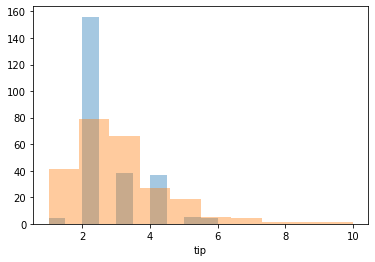

In [131]:
#I now show the realtionship between tip amount and the size of the party. 
sns.distplot(df['size'],kde=False,bins=10) 
sns.distplot(df['tip'],kde=False,bins=10) 
plt.show()

The above show the relationship between the size of the party and the tip amount. 

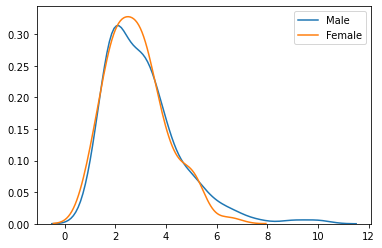

In [132]:
#I produce a graph to show the tip amount and the sex of the customers male/female.
male=df.loc[(df['sex']=='Male')]
female=df.loc[df['sex']=='Female']
sns.distplot(male[['tip']], hist=False, label='Male')
sns.distplot(female[['tip']], hist=False, label='Female')

plt.show()

The above graphy shows  males and females in realtion to the tip amount and belwo the means of the male and female tippers can be seen.  The females pay a bigger percentage of the bill tip than the males. 

In [133]:
print (male.mean())
print (female.mean())

total_bill             20.744076
tip                     3.089618
size                    2.630573
% Of Bill Tip Payed    15.765055
dtype: float64
total_bill             18.056897
tip                     2.833448
size                    2.459770
% Of Bill Tip Payed    16.649074
dtype: float64


### Creating New Data Set

Now I will create a new data set based on the mean and standard deviation of the above tips data set and will use 1000 customer for the new simulation. 

In [134]:
#using the mean and standard deviation form the tips data set on bill toatal I create a new tips data set using the random function.
from scipy.stats import norm

mean_rating = 19.75
std_devn_rating = 8.9

newbilltotal = []
for i in range(1000):
    new_val=mean_rating + np.random.normal()*std_devn_rating
    newbilltotal.append(round(new_val))   

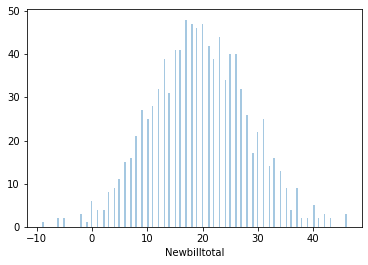

In [135]:
mydataset = pd.DataFrame(newbilltotal, columns=['Newbilltotal'])
sns.distplot(mydataset['Newbilltotal'],kde=False,bins=200) 
plt.show()

In [136]:
mean_rating = 2.99
std_devn_rating = 1.38

newtip = []
for i in range(1000):
    new_val=mean_rating + np.random.normal()*std_devn_rating
    newtip.append(round(new_val))
mydataset.insert(1,"Newtip",newtip,True)
mydataset.head()

,Newbilltotal,Newtip
0,15,2
1,8,2
2,31,0
3,17,2
4,15,0


In [137]:
#describing the new data set.
mydataset.describe()

,Newbilltotal,Newtip
count,1000.000000,1000.000000
mean,19.456000,2.965000
std,8.751723,1.433119
min,-9.000000,-1.000000
25%,13.000000,2.000000
50%,19.000000,3.000000
75%,25.000000,4.000000
max,46.000000,7.000000


In [138]:
import random

bw=['Thur','Fri', 'Sat', 'Sun']
days=[]
for i in range(1000):
    days.append(random.choice(bw))
mydataset.insert(1,"NewDay",days,True)
mydataset.head()

,Newbilltotal,NewDay,Newtip
0,15,Sun,2
1,8,Thur,2
2,31,Sat,0
3,17,Sun,2
4,15,Sun,0


In [139]:
bw=['Male','Female']
sex=[]
for i in range(1000):
    sex.append(random.choice(bw))
mydataset.insert(1,"Newsex",sex,True)
mydataset.head()

,Newbilltotal,Newsex,NewDay,Newtip
0,15,Male,Sun,2
1,8,Female,Thur,2
2,31,Male,Sat,0
3,17,Female,Sun,2
4,15,Female,Sun,0


In [140]:
bw=['2','3','4', '5', '6']
size=[]
for i in range(1000):
    size.append(random.choice(bw))
mydataset.insert(1,"Newsize",size,True)
mydataset.head()

,Newbilltotal,Newsize,Newsex,NewDay,Newtip
0,15,5,Male,Sun,2
1,8,2,Female,Thur,2
2,31,4,Male,Sat,0
3,17,4,Female,Sun,2
4,15,2,Female,Sun,0


In [141]:
bw=['Dinner','Lunch']
time=[]
for i in range(1000):
    time.append(random.choice(bw))
mydataset.insert(1,"Newtime",time,True)
mydataset.head()

,Newbilltotal,Newtime,Newsize,Newsex,NewDay,Newtip
0,15,Lunch,5,Male,Sun,2
1,8,Dinner,2,Female,Thur,2
2,31,Dinner,4,Male,Sat,0
3,17,Lunch,4,Female,Sun,2
4,15,Lunch,2,Female,Sun,0


In [142]:
#showing the last 5 items of the data set
mydataset.tail()

,Newbilltotal,Newtime,Newsize,Newsex,NewDay,Newtip
995,26,Dinner,6,Male,Thur,2
996,25,Dinner,6,Female,Thur,3
997,25,Lunch,4,Male,Thur,5
998,21,Lunch,3,Male,Fri,1
999,18,Dinner,3,Male,Sun,2


In [143]:
for i in ['Newsex','NewDay','Newsize','Newtime']:
    print (cnt(mydataset.iloc[:][i]),'\n')

Counter({'Female': 509, 'Male': 491}) 

Counter({'Sun': 259, 'Thur': 251, 'Fri': 247, 'Sat': 243}) 

Counter({'5': 218, '3': 214, '2': 210, '6': 187, '4': 171}) 

Counter({'Lunch': 531, 'Dinner': 469}) 



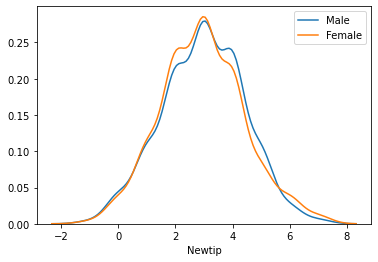

In [144]:
male=mydataset.loc[(mydataset['Newsex']=='Male')]
female=mydataset.loc[mydataset['Newsex']=='Female']
sns.distplot(male['Newtip'], hist=False, label='Male')
sns.distplot(female['Newtip'], hist=False, label='Female')

plt.show()

This new graph appears to agree with with the original data sets outcome for tips by Male and Female customers. in that Females tip higher than males.

The figures in the new data set have been rounded.

My new dataset comprises of 1000 bills of this 540 were female and 460 were male customer.
The original data set had 244 bills of this 87 were female and 157 were male.
While the new data set has more female than male customers, the biggest tipper still remains to be females for both data sets which can be seen clearly which the two graphs are placed beside each other


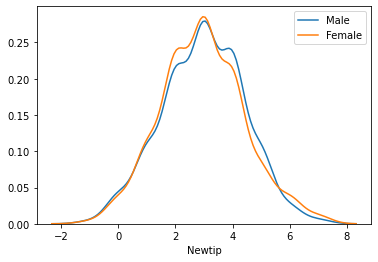

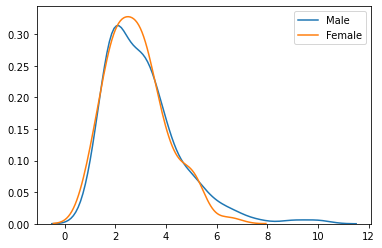

In [145]:
male=mydataset.loc[(mydataset['Newsex']=='Male')]
female=mydataset.loc[mydataset['Newsex']=='Female']
sns.distplot(male['Newtip'], hist=False, label='Male')
sns.distplot(female['Newtip'], hist=False, label='Female')

plt.show()

male=df.loc[(df['sex']=='Male')]
female=df.loc[df['sex']=='Female']
sns.distplot(male[['tip']], hist=False, label='Male')
sns.distplot(female[['tip']], hist=False, label='Female')

plt.show()


## Refrences:

For this project I reviewed class lecture videos by Dr Ian McLoughlin and Brian McGinley GMIT. 
I reviewed previous students work on Git Hub link below and used the websites listed below. 

[Git Hub](https://github.com/HFintan/pda_proj/blob/master/pda_proj.ipynb)

[Grepper](https://www.codegrepper.com/code-examples/python/sns.distplot)

[Pandas](https://pandas.pydata.org/docs/user_guide/index.html)